In [14]:
!pip install --upgrade pandas-datareader
!pip install yfinance==0.2.40 --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.50
    Uninstalling yfinance-0.2.50:
      Successfully uninstalled yfinance-0.2.50


In [8]:
import pandas as pd
import numpy as np

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

from datetime import datetime
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-12-08,194.199997,195.990005,193.669998,195.710007,194.755875,53377300,APPLE
2023-12-11,193.110001,193.490005,191.419998,193.179993,192.238220,60943700,APPLE
2023-12-12,193.080002,194.720001,191.720001,194.710007,193.760773,52696900,APPLE
2023-12-13,195.089996,198.000000,194.850006,197.960007,196.994919,70404200,APPLE
2023-12-14,198.020004,199.619995,196.160004,198.110001,197.144180,66831600,APPLE
...,...,...,...,...,...,...,...
2024-12-02,209.960007,212.990005,209.509995,210.710007,210.710007,39523200,AMAZON
2024-12-03,210.309998,214.020004,209.649994,213.440002,213.440002,32214800,AMAZON
2024-12-04,215.960007,220.000000,215.750000,218.160004,218.160004,48745700,AMAZON


In [9]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,203.464063,205.321156,201.740757,203.652311,203.157913,5.754952e+07
std,22.763424,22.981728,22.513984,22.861207,23.052496,3.052619e+07
min,165.350006,166.399994,164.080002,165.000000,164.405121,2.811130e+07
25%,183.735001,185.119995,182.180000,184.199997,183.418915,4.208175e+07
50%,197.529999,199.619995,196.000000,198.110001,197.144180,5.019060e+07
75%,225.184998,227.284996,223.340004,225.900002,225.651741,6.394325e+07
max,243.990005,244.630005,242.130005,243.039993,243.039993,3.186799e+08


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-12-08 to 2024-12-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

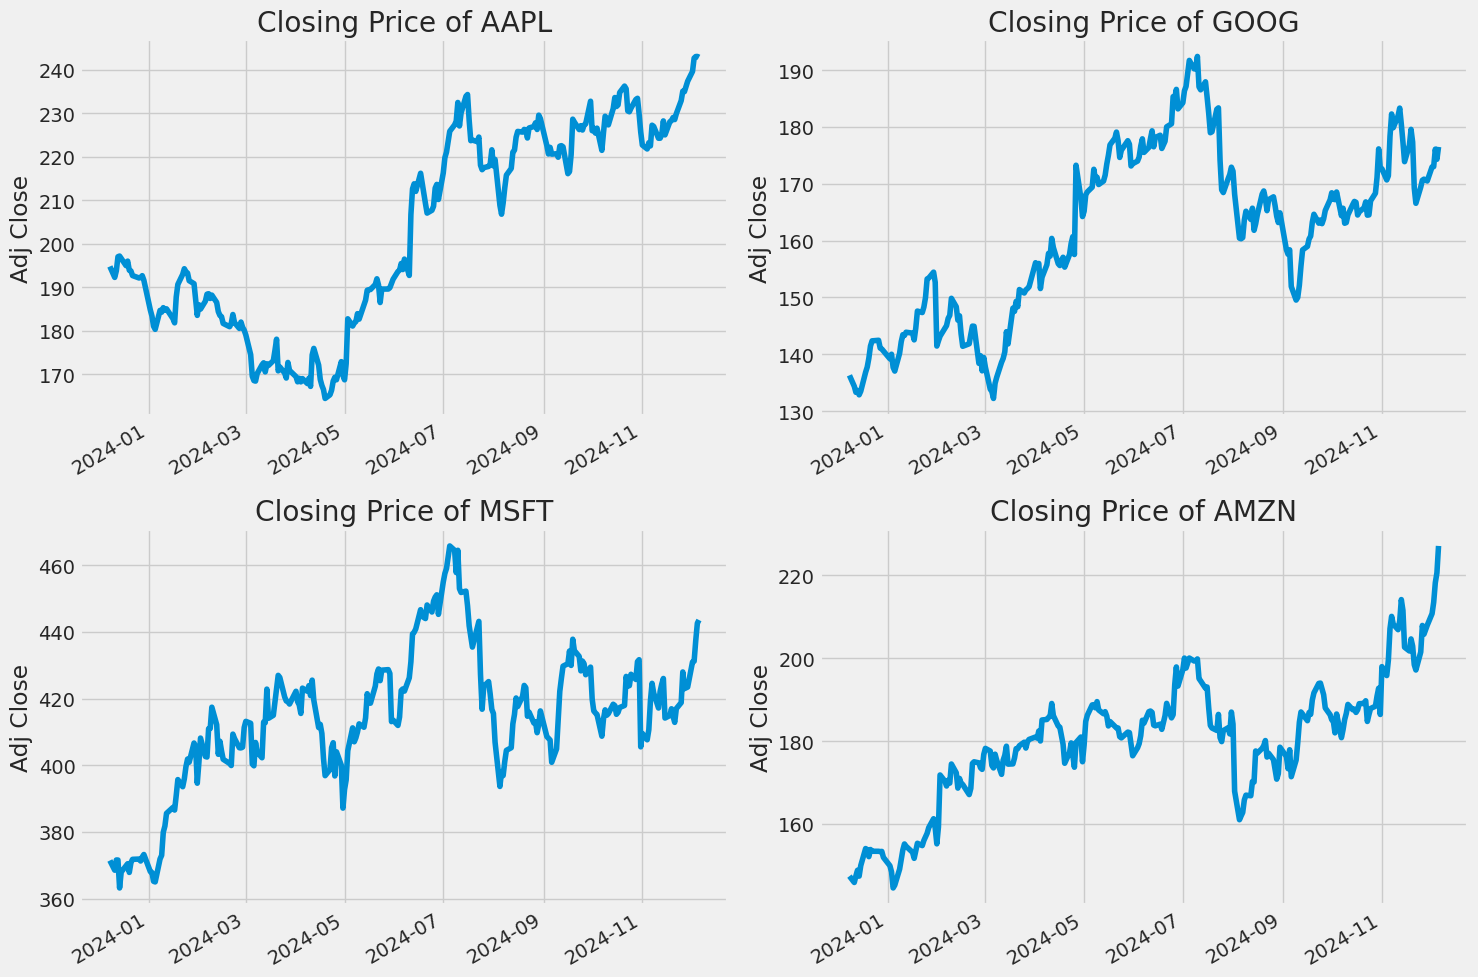

In [12]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

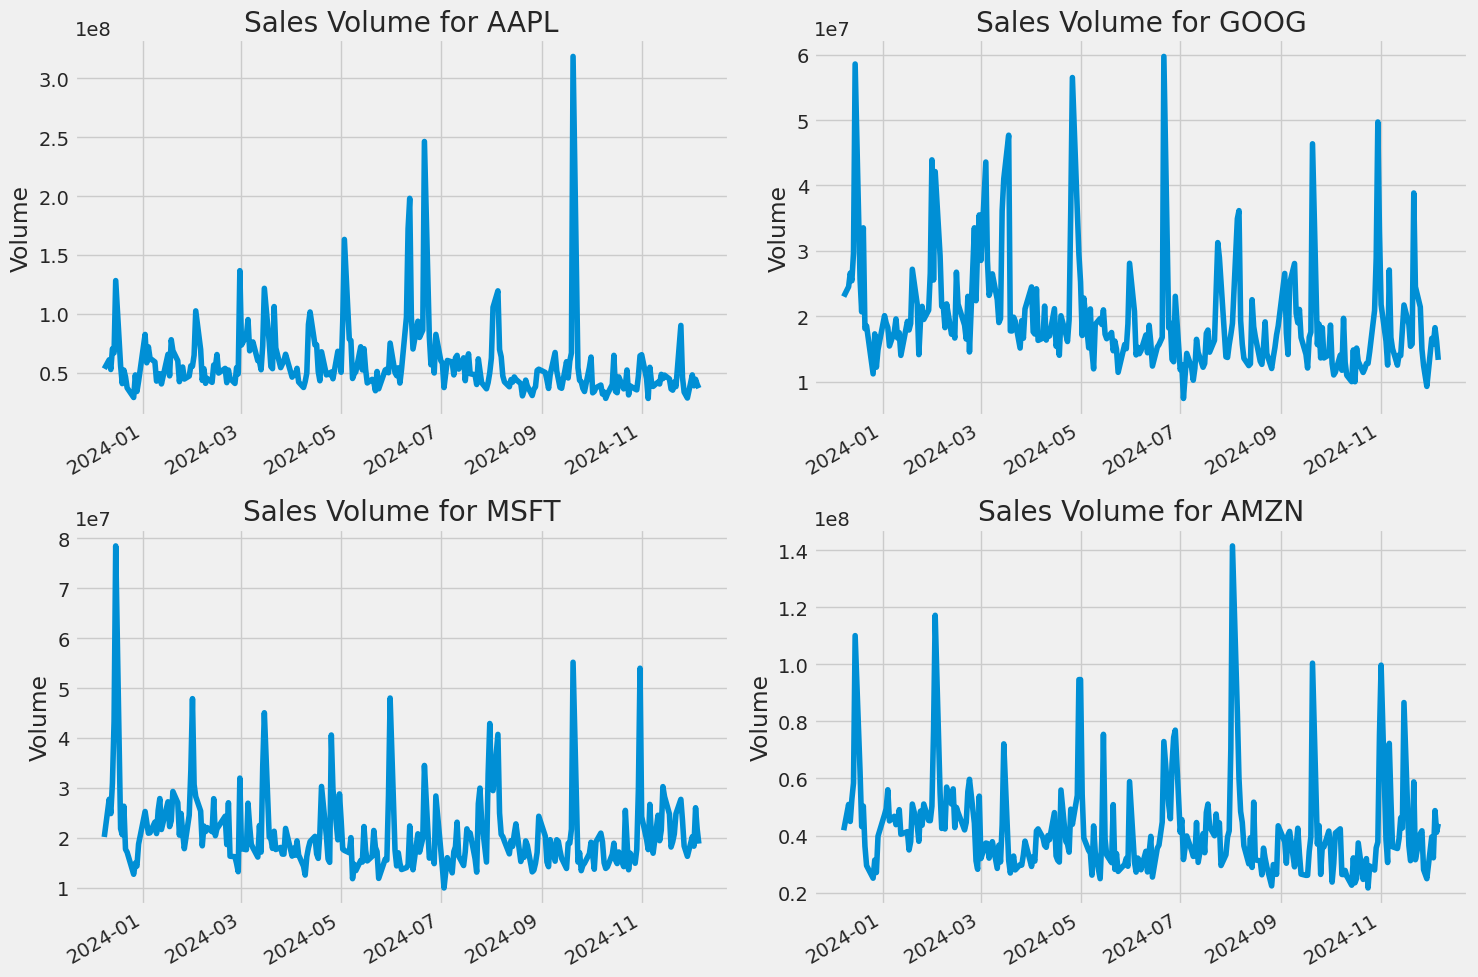

In [13]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

In [14]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-12-08,NaN,NaN,NaN,NaN
2023-12-11,-0.012927,-0.010379,-0.014198,-0.007829
2023-12-12,0.007920,0.010899,-0.007869,0.008295
2023-12-13,0.016692,0.009222,0.002469,-0.000027
2023-12-14,0.000758,-0.009540,-0.005748,-0.022545


In [16]:
df = pdr.get_data_yahoo('AAPL', start='2010-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.447411,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.458559,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.355827,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.344076,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.386255,447610800
...,...,...,...,...,...,...
2024-12-02,237.270004,240.789993,237.160004,239.589996,239.589996,48137100
2024-12-03,239.809998,242.759995,238.899994,242.649994,242.649994,38861000
2024-12-04,242.869995,244.110001,241.250000,243.009995,243.009995,44383900


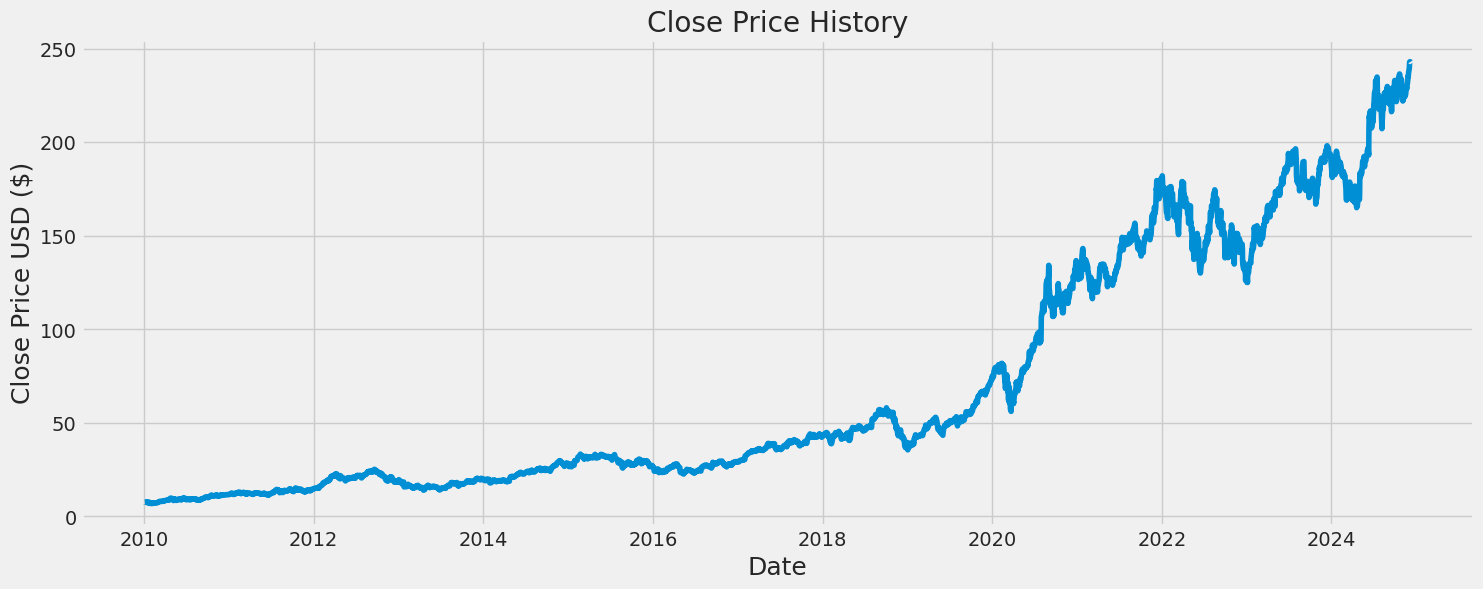

In [17]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [18]:
data = df.filter(['Close'])
dataset = data.values
#get number of rows
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3571

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00332069],
       [0.00337665],
       [0.002861  ],
       ...,
       [0.99987298],
       [1.        ],
       [0.9991532 ]])

In [23]:
train_data = scaled_data[0:int(training_data_len), :]
print(train_data)
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print("\nxtrain is :",x_train)
        print("\nytrain is :",y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[[0.00332069]
 [0.00337665]
 [0.002861  ]
 ...
 [0.6938366 ]
 [0.70238938]
 [0.7044217 ]]

xtrain is : [array([3.32069411e-03, 3.37664520e-03, 2.86099996e-03, 2.80202247e-03,
       3.01372526e-03, 2.73095552e-03, 2.36954576e-03, 2.81260781e-03,
       2.62812649e-03, 2.09887153e-03, 3.47644581e-03, 2.97592451e-03,
       2.42247044e-03, 8.61927028e-04, 1.66639481e-03, 2.10038372e-03,
       2.39374284e-03, 1.09479848e-03, 1.51017270e-06, 4.05255247e-04,
       5.76128865e-04, 1.08572533e-03, 0.00000000e+00, 5.15641199e-04,
       3.13013575e-04, 6.26031189e-04, 4.64228702e-04, 1.00104462e-03,
       1.25962535e-03, 1.71629714e-03, 1.58776488e-03, 1.64522413e-03,
       1.45469202e-03, 1.26567210e-03, 7.57587824e-04, 1.30196672e-03,
       1.50459434e-03, 1.90077846e-03, 2.56159409e-03, 2.54042341e-03,
       2.61300255e-03, 2.82168096e-03, 4.06770063e-03, 4.08735912e-03,
       4.68314850e-03, 4.95835930e-03, 5.05815991e-03, 5.22450099e-03,
       4.80714619e-03, 4.89938584e-03, 4.849

(3511, 60, 1)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3511/3511 ━━━━━━━━━━━━━━━━━━━━ 182s 51ms/step - loss: 0.0012


In [25]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step


5.3677292929005755

In [31]:
print(y_test,predictions)

[[171.13000488]
 [173.        ]
 [172.61999512]
 [173.72000122]
 [176.08000183]
 [178.66999817]
 [171.36999512]
 [172.27999878]
 [170.8500061 ]
 [169.71000671]
 [173.30999756]
 [171.47999573]
 [170.02999878]
 [168.83999634]
 [169.6499939 ]
 [168.82000732]
 [169.58000183]
 [168.44999695]
 [169.66999817]
 [167.77999878]
 [175.03999329]
 [176.55000305]
 [172.69000244]
 [169.38000488]
 [168.        ]
 [167.03999329]
 [165.        ]
 [165.83999634]
 [166.8999939 ]
 [169.02000427]
 [169.88999939]
 [169.30000305]
 [173.5       ]
 [170.33000183]
 [169.30000305]
 [173.02999878]
 [183.38000488]
 [181.71000671]
 [182.3999939 ]
 [182.74000549]
 [184.57000732]
 [183.05000305]
 [186.27999878]
 [187.42999268]
 [189.72000122]
 [189.83999634]
 [189.86999512]
 [191.03999329]
 [192.3500061 ]
 [190.8999939 ]
 [186.88000488]
 [189.97999573]
 [189.99000549]
 [190.28999329]
 [191.28999329]
 [192.25      ]
 [194.02999878]
 [194.3500061 ]
 [195.86999512]
 [194.47999573]
 [196.88999939]
 [193.11999512]
 [207.14

In [29]:
x_test.shape

(187, 60, 1)

<ipython-input-26-8a37714f6c8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


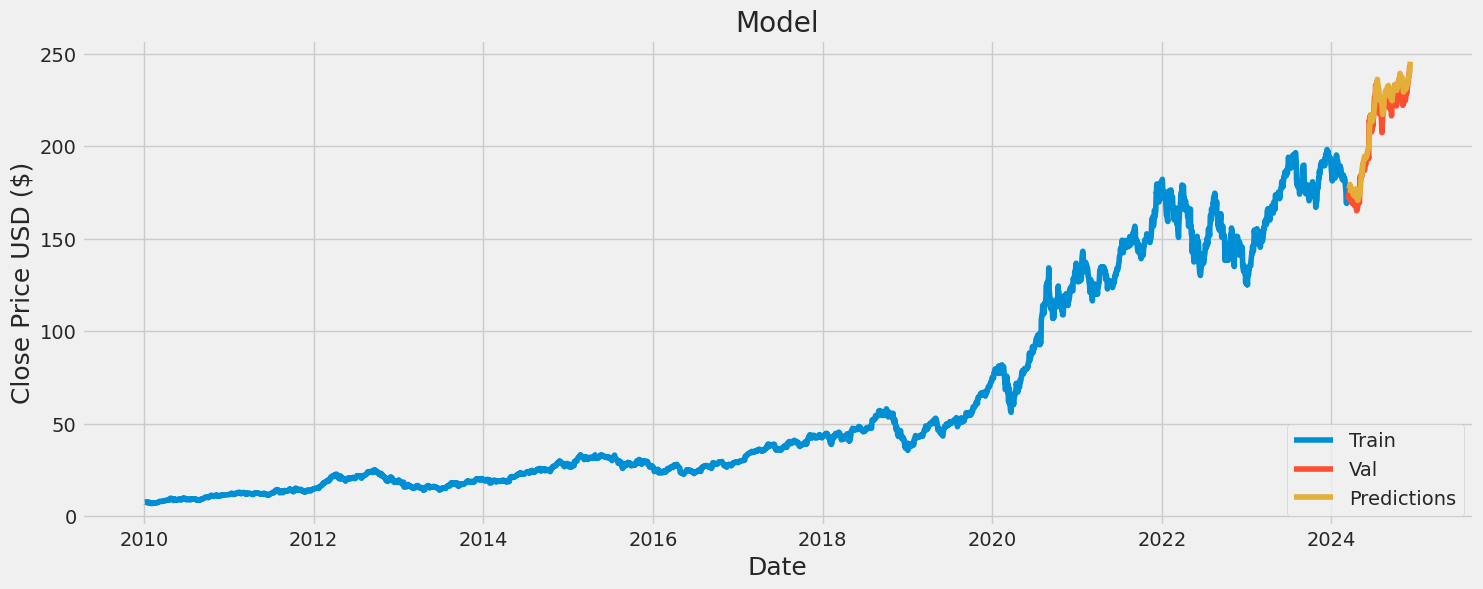

In [26]:
# Visualize the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()